#### <b>Nome:</b> Gabriel Nunes Henke
#### <b>Data:</b> 20/12/2022
#### <b>Programa:</b> PPGCC - UNESP
#### <b>Disciplina:</b> Visualização de Dados
#### <b>Professor:</b> Danilo Eler

<img src="img/unesp.jpg" width="200" height="200"></img>

## Projeto: Visualização de dados em análise de dados meteorológicos

### Fonte: INMET (https://portal.inmet.gov.br/)

===============================================================================================================================================================

#### Aplicabilidade:
-> Agronegócio

-> Aviação

-> Geografia 

-> ...

#### Problemas:
-> Manejos agrícolas de tratos culturais e colheitas

-> Geadas

-> Monitoramento de pragas e doenças

#### Usabilidade:
-> Machine learning

-> Análise do passado

-> Aplicabilidade mecânica para tomada de decisão





In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [118]:
df = pd.read_csv('data/processed/df_final.csv')

In [119]:
df.head()

,DATA,estacao,pa_max_h_ant,temp_max_h_ant,temp_orvalho_max_h_ant,vento_rajada_max,pa_min_na_hora_ant,temp_min_h_ant,umidade_rel_min_h_ant,precipitacao,pa_nivel_da_estacao_h,rad_global,temp_ar_bulbo_seco,temp_ponto_orvalho,umidade_relativa_do_ar_horaria_percentage,vento_dir_h,velocidade_vento_h
0,2000-05-07,BRASILIA,888.4,28.3,16.1,6.3,885.4,20.7,36.0,0.0,886.758333,1880.000000,25.125000,13.383333,48.416667,129.083333,1.766667
1,2000-05-07,ECOLOGIA AGRICOLA,1014.4,23.0,18.9,8.7,1011.6,20.8,67.0,0.0,1012.641667,348.600000,22.233333,17.441667,74.250000,193.583333,2.041667
2,2000-05-08,BRASILIA,890.2,28.2,17.0,7.1,886.8,16.5,33.0,0.0,888.062500,1783.833333,22.104167,13.533333,60.500000,117.000000,2.066667
3,2000-05-08,ECOLOGIA AGRICOLA,1015.5,26.5,19.3,5.3,1010.7,19.7,58.0,0.0,1013.408333,618.750000,22.154167,18.179167,79.083333,83.416667,0.979167
4,2000-05-09,BRASILIA,890.1,28.7,16.2,7.0,886.7,16.6,37.0,0.0,888.083333,1446.666667,22.041667,13.229167,58.791667,157.500000,1.150000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709429 entries, 0 to 2709428
Data columns (total 17 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   DATA                                       object 
 1   estacao                                    object 
 2   pa_max_h_ant                               float64
 3   temp_max_h_ant                             float64
 4   temp_orvalho_max_h_ant                     float64
 5   vento_rajada_max                           float64
 6   pa_min_na_hora_ant                         float64
 7   temp_min_h_ant                             float64
 8   umidade_rel_min_h_ant                      float64
 9   precipitacao                               float64
 10  pa_nivel_da_estacao_h                      float64
 11  rad_global                                 float64
 12  temp_ar_bulbo_seco                         float64
 13  temp_ponto_orvalho                        

In [121]:
len(df)

2709429

In [122]:
df['DATA'] = pd.to_datetime(df['DATA'])
df = df.set_index('DATA')
df = df.sort_index()

## Considerando a temperatura media de todos os anos, qual é a cidade mais quente do Brasil?

In [123]:
temp_max = [x[0] for x in df[:][['estacao', 'temp_max_h_ant']].groupby('estacao').mean().sort_values(by='temp_max_h_ant', ascending=False).head(10).values]
cidades_max = list(df['2021':][['estacao', 'temp_max_h_ant']].groupby('estacao').mean().sort_values(by='temp_max_h_ant', ascending=False).head(10).index)

Text(0.5, 1.0, 'Temperatura máxima das estações do Brasil')

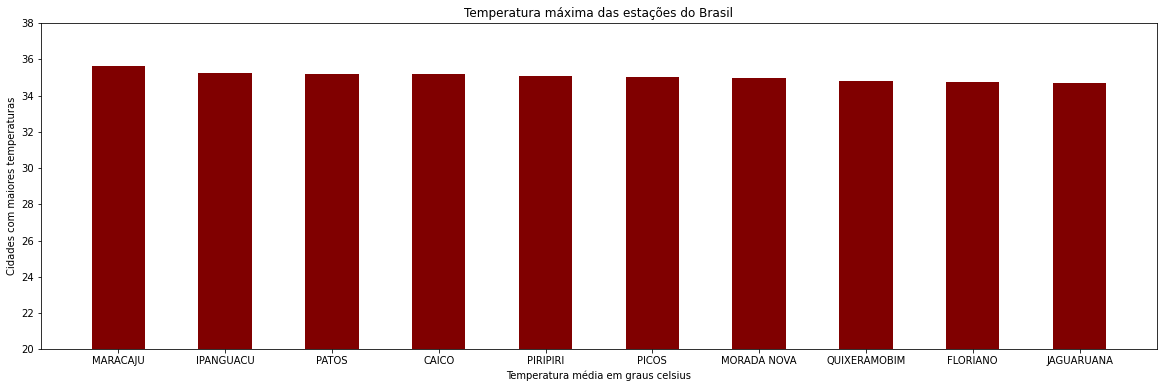

In [124]:

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(cidades_max, temp_max, color ='maroon', width = 0.5, label = temp_max)
ax.set_ylim([20,38])
ax.set_xlabel("Temperatura média em graus celsius")
ax.set_ylabel("Cidades com maiores temperaturas")
ax.set_title("Temperatura máxima das estações do Brasil")


<img src="img/jaguaribe.png" width="400" height="400"></img>
<img src="img/picos.png" width="400" height="400"></img>
<img src="img/ipanguacu.png" width="400" height="400"></img>

## Considerando a temperatura media de todos os anos, qual é a cidade mais fria do Brasil?

In [125]:
temps_min = [x[0] for x in df[:][['estacao', 'temp_min_h_ant']].groupby('estacao').mean().sort_values(by='temp_min_h_ant', ascending=True).head(10).values]
cidades_min = list(df[:][['estacao', 'temp_min_h_ant']].groupby('estacao').mean().sort_values(by='temp_min_h_ant', ascending=True).head(10).index)

In [126]:
df[:][['estacao', 'temp_min_h_ant']].groupby('estacao').mean().sort_values(by='temp_min_h_ant', ascending=True).head(10)

,temp_min_h_ant
estacao,
CRIOSFERA,-33.746995
ITATIAIA,5.071738
BOM JARDIM DA SERRA - MORRO DA IGREJA,8.101032
SAO JOSE DOS AUSENTES,9.997597
SAO JOAQUIM,10.103023
MONTE VERDE,10.235089
CAMPOS DO JORDAO,10.486577
VACARIA,10.948577
GENERAL CARNEIRO,11.189357


<ipython-input-127-194d9558adbb>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cidades_min, rotation = 45)


[Text(0, 0, 'CRIOSFERA'),
 Text(1, 0, 'ITATIAIA'),
 Text(2, 0, 'BOM JARDIM DA SERRA - MORRO DA IGREJA'),
 Text(3, 0, 'SAO JOSE DOS AUSENTES'),
 Text(4, 0, 'SAO JOAQUIM'),
 Text(5, 0, 'MONTE VERDE'),
 Text(6, 0, 'CAMPOS DO JORDAO'),
 Text(7, 0, 'VACARIA'),
 Text(8, 0, 'GENERAL CARNEIRO'),
 Text(9, 0, 'CAMBARA DO SUL')]

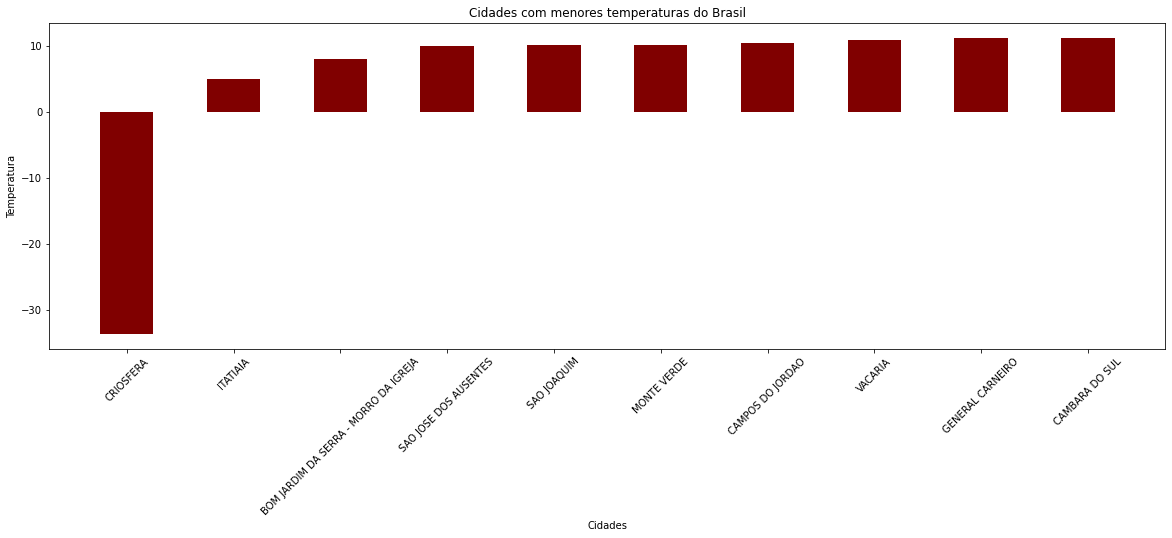

In [127]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(cidades_min, temps_min, color ='maroon', width = 0.5, label = cidades_min)
# ax.set_ylim([20,38])
ax.set_xlabel("Cidades")
ax.set_ylabel("Temperatura")
ax.set_title("Cidades com menores temperaturas do Brasil")
ax.set_xticklabels(cidades_min, rotation = 45)


<img src="img/itatiaia.png" width="400" height="400"></img>
<img src="img/bom_jardim_da_serra.png" width="400" height="400"></img>
<img src="img/sao_jose_dos_ausentes.png" width="400" height="400"></img>

## - Quais as cidades brasileiras tem maior amplitude térmica ?

In [128]:
df_amplitude = df[:][['estacao', 'temp_min_h_ant', 'temp_max_h_ant', 'umidade_rel_min_h_ant', 'precipitacao']].groupby('estacao').mean()
df_amplitude['amplitude'] = df_amplitude['temp_max_h_ant'] - df_amplitude['temp_min_h_ant']

In [129]:
amplitudes = list(df_amplitude['amplitude'].sort_values(ascending=False).head(10).values)
cidades_amplitude = list(df_amplitude['amplitude'].sort_values(ascending=False).head(10).index)

Text(0.5, 1.0, 'Cidades com maiores amplitudes térmicas')

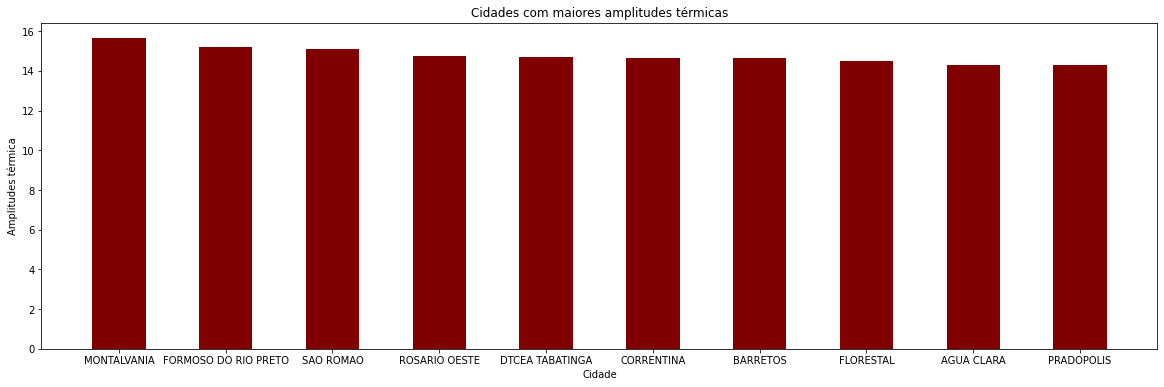

In [130]:
fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(cidades_amplitude, amplitudes, color ='maroon', width = 0.5, label = cidades_amplitude)
# ax.set_ylim([20,38])
ax.set_xlabel("Cidade")
ax.set_ylabel("Amplitudes térmica")
ax.set_title("Cidades com maiores amplitudes térmicas")

<img src="img/montalvania.png" width="400" height="400"></img>
<img src="img/formoso.png" width="400" height="400"></img>
<img src="img/saoromao.png" width="400" height="400"></img>

In [131]:
def classification(value):
    if value <= 10:
        return "Baixo"
    elif value > 10 and value <= 28:
        return "Médio"
    elif value > 28 and value <= 35:
        return "Alto"
    elif value > 35:
        return "Muito Alto"

In [132]:
df["nivel_temperatura"] = df["temp_max_h_ant"].apply(classification)

In [133]:
df.nivel_temperatura.value_counts()

Alto          1444405
Médio          763130
Muito Alto     246161
Baixo            3515
Name: nivel_temperatura, dtype: int64

<AxesSubplot:>

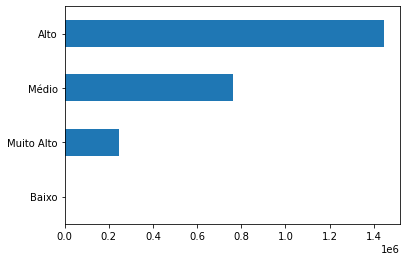

In [134]:
df.nivel_temperatura.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

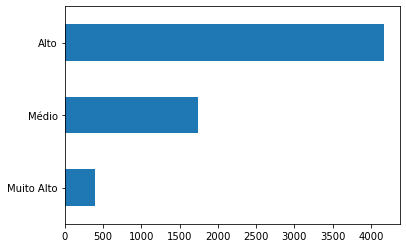

In [135]:
df.loc[df['estacao'].isin(["PRESIDENTE PRUDENTE"])]['nivel_temperatura'].value_counts().sort_values().plot(kind = 'barh')

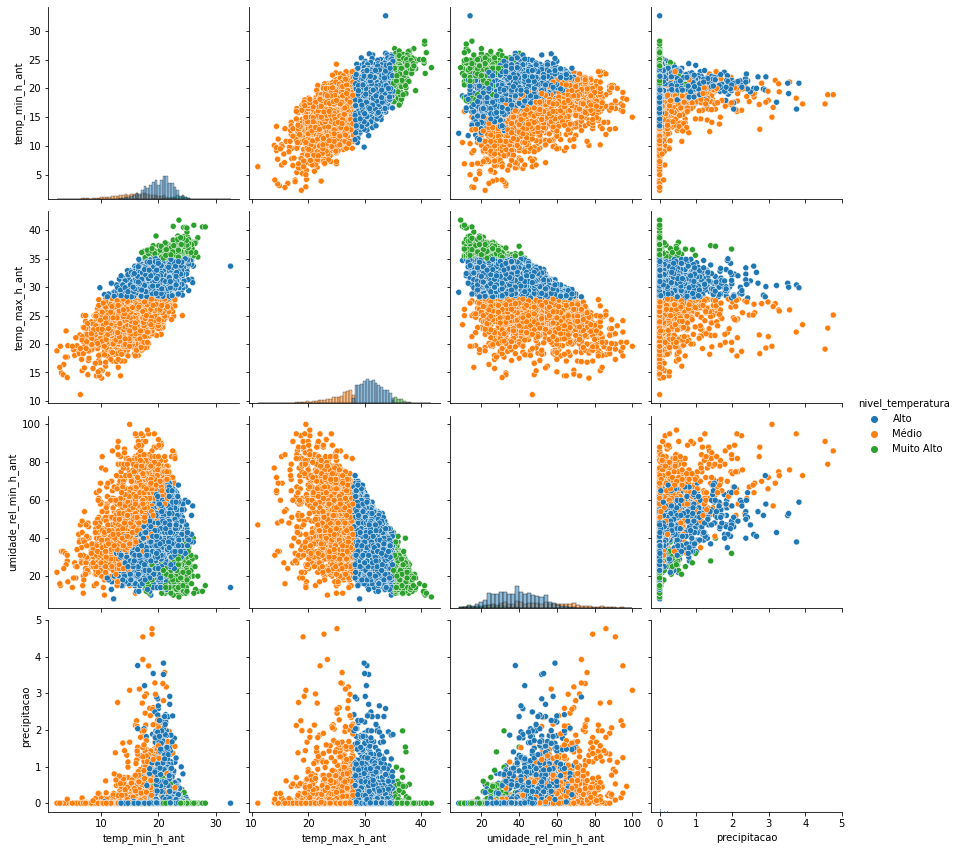

Wall time: 19.9 s


In [136]:
%%time
sns.pairplot(df.loc[df['estacao'].isin(["PRESIDENTE PRUDENTE"])], vars = ['temp_min_h_ant', 'temp_max_h_ant', 'umidade_rel_min_h_ant', 'precipitacao'], hue='nivel_temperatura', diag_kind = 'hist', height=3)
plt.show()

## Qual a relação do volume de chuva com a temperatura em Presidente prudente? existe inferência?

In [137]:
df.loc[df['estacao'] == "PRESIDENTE PRUDENTE"]

,estacao,pa_max_h_ant,temp_max_h_ant,temp_orvalho_max_h_ant,vento_rajada_max,pa_min_na_hora_ant,temp_min_h_ant,umidade_rel_min_h_ant,precipitacao,pa_nivel_da_estacao_h,rad_global,temp_ar_bulbo_seco,temp_ponto_orvalho,umidade_relativa_do_ar_horaria_percentage,vento_dir_h,velocidade_vento_h,nivel_temperatura
DATA,,,,,,,,,,,,,,,,,
2003-02-04,PRESIDENTE PRUDENTE,966.3,33.2,21.1,6.9,961.2,22.6,41.0,0.000000,964.504167,2156.846154,27.566667,18.954167,60.958333,143.791667,1.966667,Alto
2003-02-05,PRESIDENTE PRUDENTE,965.5,32.5,21.2,10.5,961.0,22.1,44.0,0.066667,963.612500,1540.615385,26.150000,19.041667,66.166667,119.375000,1.925000,Alto
2003-02-06,PRESIDENTE PRUDENTE,964.9,33.3,21.4,7.5,960.0,21.8,41.0,0.008696,963.091304,2035.692308,26.452174,20.160870,70.565217,157.043478,1.769565,Alto
2003-02-07,PRESIDENTE PRUDENTE,965.6,33.3,21.8,7.0,960.8,23.8,42.0,0.000000,963.283333,2042.076923,28.491667,20.400000,62.833333,99.916667,2.037500,Alto
2003-02-08,PRESIDENTE PRUDENTE,966.2,33.8,22.9,7.6,961.2,22.3,43.0,0.208333,964.341667,2034.307692,27.004167,20.854167,71.000000,168.125000,1.904167,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,PRESIDENTE PRUDENTE,960.7,37.5,14.7,7.0,955.8,24.0,19.0,0.000000,958.400000,1678.571429,30.595833,11.662500,32.875000,236.000000,0.812500,Muito Alto
2021-12-28,PRESIDENTE PRUDENTE,961.2,38.7,18.0,8.0,956.9,23.9,19.0,0.000000,959.004167,1347.878571,30.112500,14.337500,40.166667,236.000000,1.070833,Muito Alto
2021-12-29,PRESIDENTE PRUDENTE,964.0,31.0,20.2,9.3,959.5,22.1,43.0,0.008333,961.825000,1030.278571,25.275000,18.204167,65.958333,236.000000,1.358333,Alto


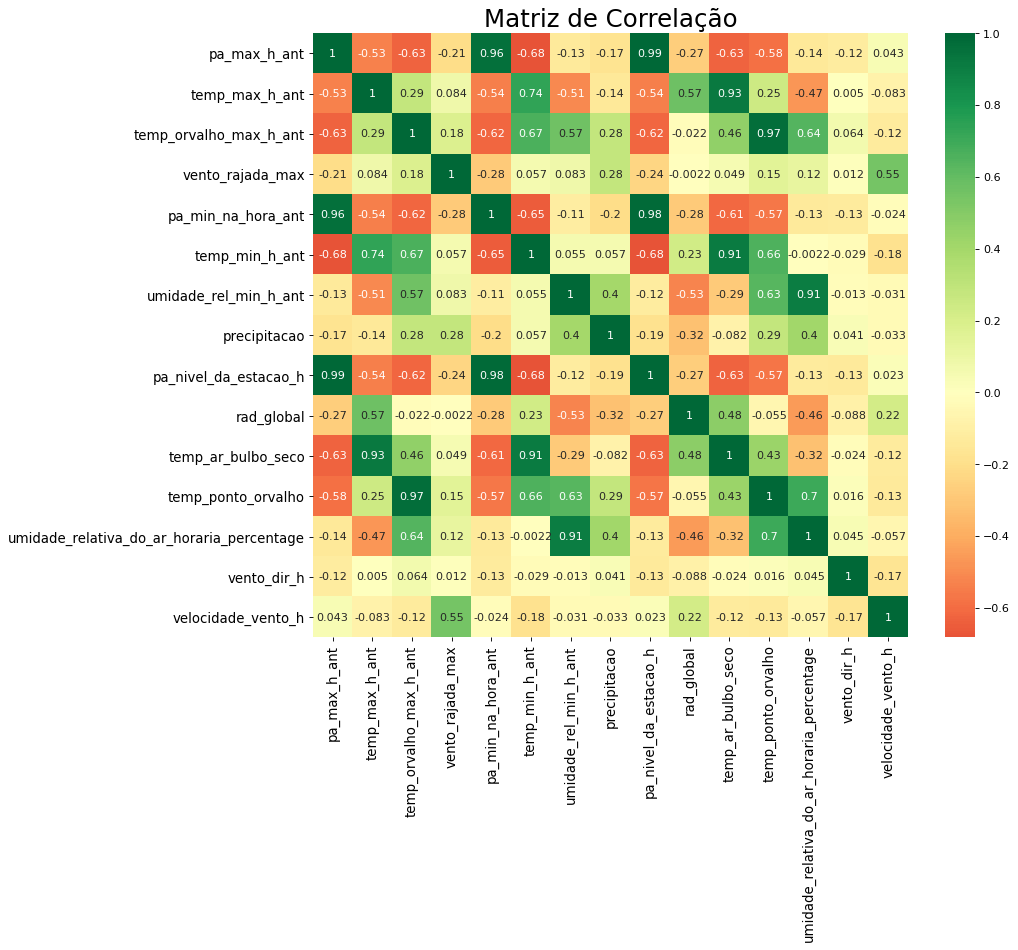

In [138]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.loc[df['estacao'] == "PRESIDENTE PRUDENTE"].corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Matriz de Correlação', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [139]:
# plt.figure(figsize=(10,8), dpi= 80)
# sns.pairplot(df.loc[df['estacao'] == "PRESIDENTE PRUDENTE"].corr(), kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
# plt.show()

## Prudente é quente mesmo? qual a relação da temperatura de Presidente prudente com as cidades mais quentes do Brasil ?


In [140]:
df_comparativo = df.copy()
df_comparativo['year'] = df_comparativo.index.year
df_comparativo = df_comparativo.reset_index()[['year', 'estacao', 'temp_max_h_ant']]
df_comparativo = df_comparativo.groupby(['year', 'estacao']).mean()

In [141]:
df_comparativo.reset_index()[['year', 'estacao', 'temp_max_h_ant']]

,year,estacao,temp_max_h_ant
0,2000,BRASILIA,26.923661
1,2000,ECOLOGIA AGRICOLA,28.460455
2,2000,MANAUS,31.479825
3,2000,PORTO ALEGRE,26.290099
4,2000,SALVADOR,29.644318
...,...,...,...
7738,2021,VITORIA DA CONQUISTA,28.032394
7739,2021,VOTUPORANGA,31.741370
7740,2021,XANXERE,24.204696
7741,2021,XINGUARA,32.199178


JAGUARIBE

PIRIPIRI

JAGUARIBE

TERESINA

MARACAJU

ARAGUACU

SOBRAL

BOM JESUS DO PIAUI

OEIRAS

IPANGUACU


In [142]:
#SOBRAL
year_pp = df_comparativo.loc[(slice(None),['PRESIDENTE PRUDENTE']),:]['temp_max_h_ant'].reset_index()['year'].values
year_teresina = df_comparativo.loc[(slice(None),['TERESINA']),:]['temp_max_h_ant'].reset_index()['year'].values
year_bom_jesus = df_comparativo.loc[(slice(None),['BOM JESUS DO PIAUI']),:]['temp_max_h_ant'].reset_index()['year'].values
year_maracaju = df_comparativo.loc[(slice(None),['MARACAJU']),:]['temp_max_h_ant'].reset_index()['year'].values
year_sobral = df_comparativo.loc[(slice(None),['SOBRAL']),:]['temp_max_h_ant'].reset_index()['year'].values

pp = df_comparativo.loc[(slice(None),['PRESIDENTE PRUDENTE']),:]['temp_max_h_ant'].values
teresina = df_comparativo.loc[(slice(None),['TERESINA']),:]['temp_max_h_ant'].values
bom_jesus = df_comparativo.loc[(slice(None),['BOM JESUS DO PIAUI']),:]['temp_max_h_ant'].values
maracaju = df_comparativo.loc[(slice(None),['MARACAJU']),:]['temp_max_h_ant'].values
sobral = df_comparativo.loc[(slice(None),['SOBRAL']),:]['temp_max_h_ant'].values

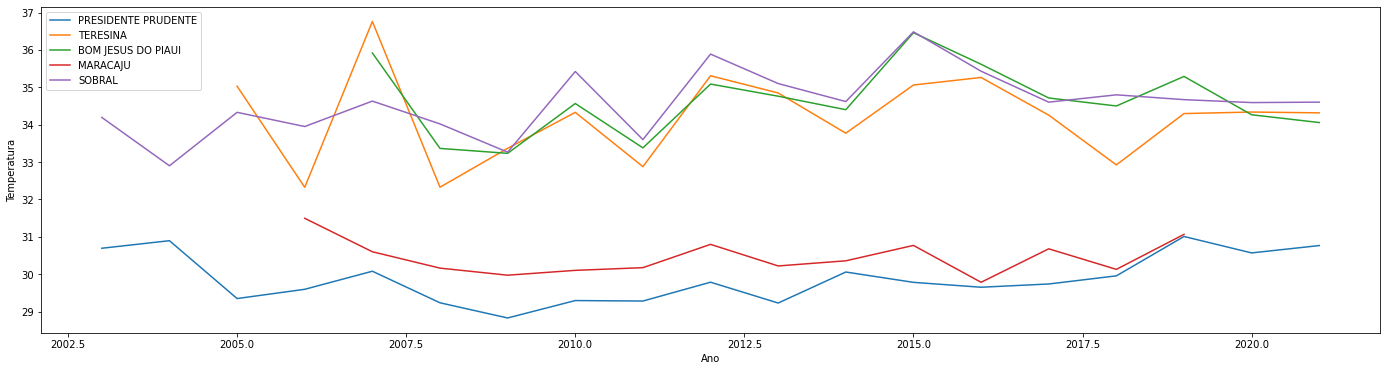

In [143]:
fig, ax = plt.subplots(figsize=(24, 6))
ax.plot(year_pp, pp,  linestyle='-', linewidth = 1.5, label='PRESIDENTE PRUDENTE')
ax.plot(year_teresina, teresina,  linestyle='-', linewidth = 1.5, label='TERESINA')
ax.plot(year_bom_jesus, bom_jesus,  linestyle='-', linewidth = 1.5, label='BOM JESUS DO PIAUI')
ax.plot(year_maracaju, maracaju,  linestyle='-', linewidth = 1.5, label='MARACAJU')
ax.plot(year_sobral, sobral,  linestyle='-', linewidth = 1.5, label='SOBRAL')
ax.set_ylabel('Temperatura')
ax.set_xlabel('Ano')
ax.legend();

## Cluster de temperatura com Kmeans

In [144]:
kmeans = KMeans(n_clusters= 4)

In [145]:
df_cluster = df[['estacao','nivel_temperatura']].groupby(['estacao', 'nivel_temperatura']).size().unstack(fill_value=0)

In [146]:
label = kmeans.fit_predict(df_cluster.values)


In [147]:
df_cluster

nivel_temperatura,Alto,Baixo,Muito Alto,Médio
estacao,,,,
ABROLHOS,1251,0,0,2344
ACARAU,3218,0,487,77
AFONSO CLAUDIO,1796,0,137,1476
AGUA BOA,3995,0,626,378
AGUA CLARA,2414,0,1064,494
...,...,...,...,...
VOTUPORANGA,3599,0,621,673
XANXERE,970,46,0,3817
XEREM,2633,0,630,1970


In [148]:
pca = PCA(2)
 
#Transform the data
df_cluster = pca.fit_transform(df_cluster)
# df_cluster['label'] = label

In [149]:
df_cluster.shape

(623, 2)

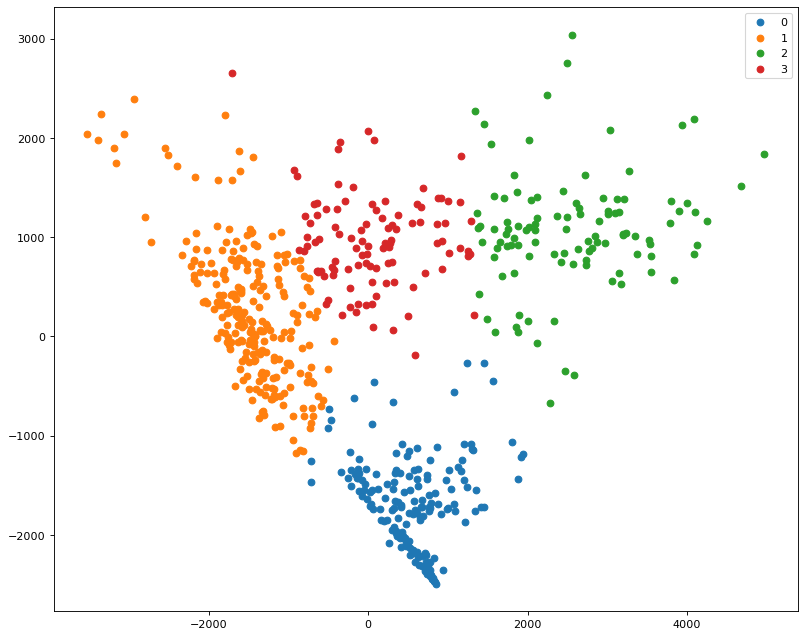

In [150]:
u_labels = np.unique(label)
 
#plotting the results:


plt.figure(figsize=(12,10), dpi= 80)
for i in u_labels:
    plt.scatter(df_cluster[label == i , 0] , df_cluster[label == i , 1] , label = i)
plt.legend()
plt.show()

## Previsão de geada

https://www.scielo.br/j/rbeaa/a/NYyDCgvZhzvLmyGWySs7DBy/?lang=pt#ModalImgbc8c78006aecd9fbcb4e700c5d089c13b9243f3b
http://www.leb.esalq.usp.br/leb/aulas/lce306/Aula12_2012_Geada_modificada_em_pdf.pdf


In [186]:
df_geada = df.copy()

In [187]:
def geada(value):
    if value <= 3:
        return True
    return False

In [188]:
df_geada["geada"] = df_geada["temp_min_h_ant"].apply(geada)

In [189]:
df_geada.geada.value_counts()

False    2695941
True       13488
Name: geada, dtype: int64

In [190]:
df_geada_false = df_geada.loc[df_geada['geada'] == False].sample(n=50000)
df_geada_true =  df_geada.loc[df_geada['geada'] == True]

In [191]:
df_final_geada = pd.concat([df_geada_true, df_geada_false])

In [ ]:
%%time
sns.pairplot(df_final_geada, vars = ['temp_min_h_ant', 'temp_max_h_ant', 'umidade_rel_min_h_ant', 'precipitacao'], hue='geada', diag_kind = 'hist', height=3)
plt.show()

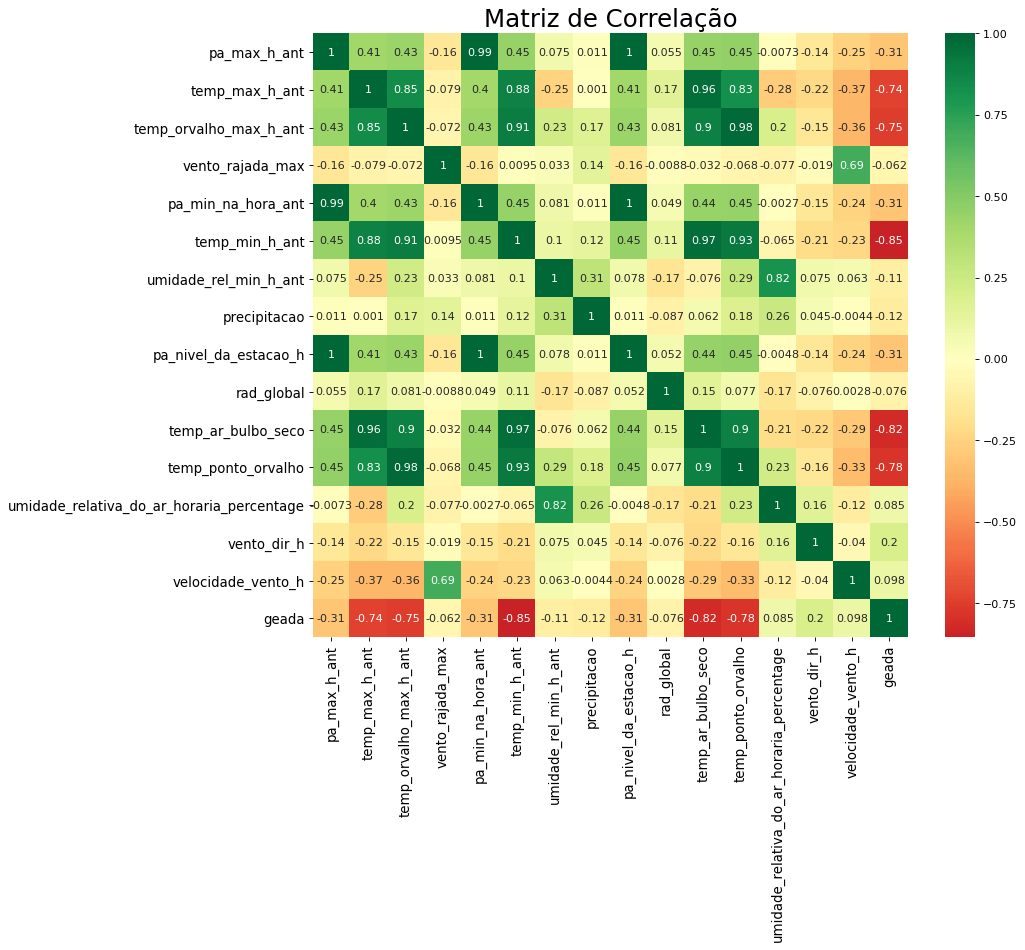

In [193]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_final_geada.corr(), xticklabels=df_final_geada.corr().columns, yticklabels=df_final_geada.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Matriz de Correlação', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [194]:
df_final_geada= df_final_geada.dropna()

In [195]:
df_final_geada['nivel_temperatura'] = pd.factorize(df_final_geada['nivel_temperatura'])[0]

<ipython-input-195-fcbd58b02792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_geada['nivel_temperatura'] = pd.factorize(df_final_geada['nivel_temperatura'])[0]


<AxesSubplot:>

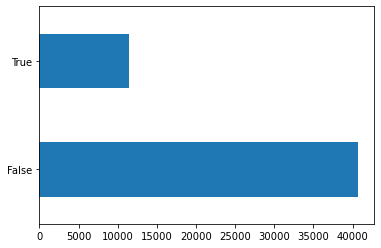

In [196]:
df_final_geada['geada'].value_counts().plot(kind = 'barh')

### Feature Selection

In [197]:
features = ['temp_max_h_ant', 'temp_orvalho_max_h_ant', 'temp_min_h_ant', 'temp_ar_bulbo_seco', 'pa_max_h_ant', 'pa_min_na_hora_ant', 'nivel_temperatura']

In [198]:
X = df_final_geada[features]
y = df_final_geada['geada']

array([[<AxesSubplot:title={'center':'temp_max_h_ant'}>,
        <AxesSubplot:title={'center':'temp_orvalho_max_h_ant'}>,
        <AxesSubplot:title={'center':'temp_min_h_ant'}>],
       [<AxesSubplot:title={'center':'temp_ar_bulbo_seco'}>,
        <AxesSubplot:title={'center':'pa_max_h_ant'}>,
        <AxesSubplot:title={'center':'pa_min_na_hora_ant'}>],
       [<AxesSubplot:title={'center':'nivel_temperatura'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

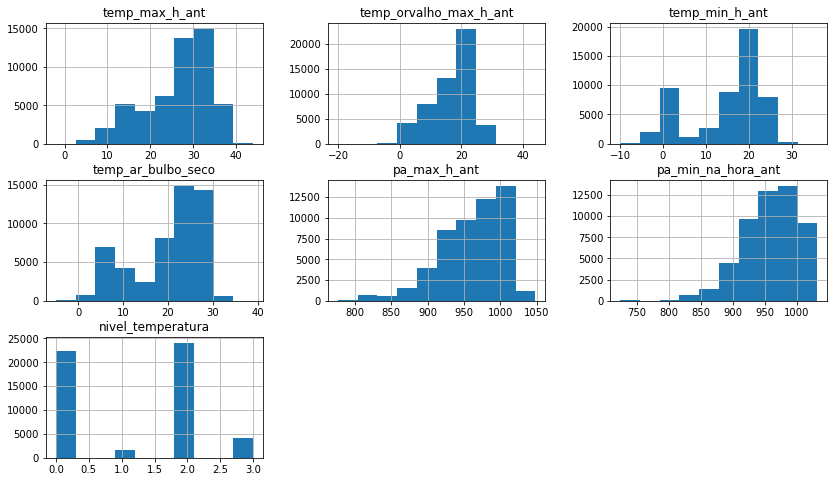

In [199]:
X.round().hist(figsize=(14,8))

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [201]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [202]:
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     13367
        True       1.00      1.00      1.00      3868

    accuracy                           1.00     17235
   macro avg       1.00      1.00      1.00     17235
weighted avg       1.00      1.00      1.00     17235



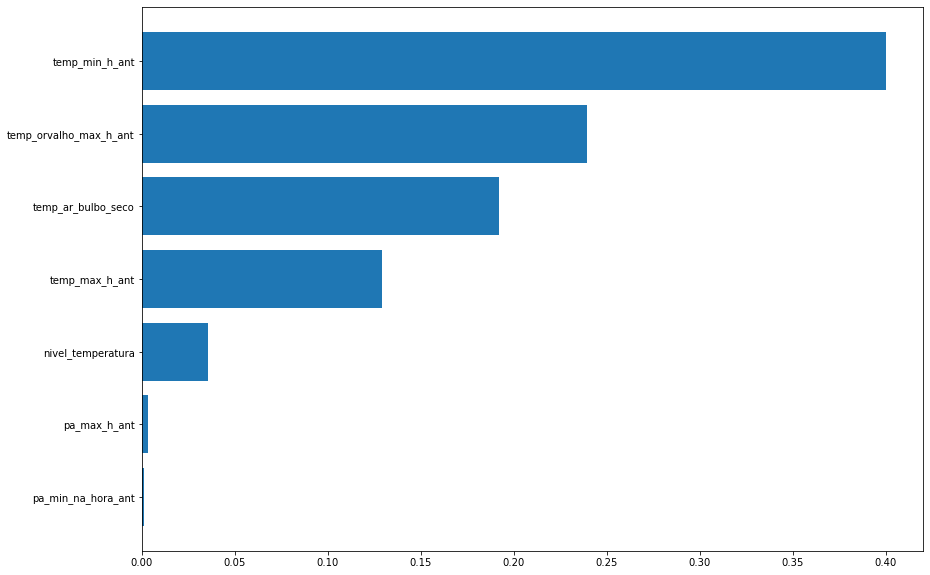

In [203]:
f_i = list(zip(X_train.columns,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])

plt.figure(figsize=(14,10))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

## Treinamento dos modelos

In [204]:
models = [
    ("Random_Forest", RandomForestClassifier(random_state=42)),
    ("Decision_Tree", DecisionTreeClassifier()),
    ("Naive_Bayes", GaussianNB()),
    ("Logistic_Regression", LogisticRegression(max_iter=1000, random_state =0 ))
]

In [205]:
%%time

trained_models = []
results = {'modelo': [], 'acuracia': [], 'precisao': [], 'recall': []}

for name, model in models:
    print(f"Treinando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    trained_models.append((name, model, metrics.accuracy_score(y_test, y_pred)))
    results['modelo'].append(name)
    results['acuracia'].append(metrics.accuracy_score(y_test, y_pred))
    results['precisao'].append(metrics.precision_score(y_test, y_pred))
    results['recall'].append(metrics.recall_score(y_test, y_pred, average='macro'))

Treinando Random_Forest...
Treinando Decision_Tree...
Treinando Naive_Bayes...
Treinando Logistic_Regression...
Wall time: 1.88 s


In [206]:
df_results = pd.DataFrame(data=results)
df_results

,modelo,acuracia,precisao,recall
0,Random_Forest,1.000000,1.000000,1.000000
1,Decision_Tree,1.000000,1.000000,1.000000
2,Naive_Bayes,0.979692,0.927564,0.982131
3,Logistic_Regression,0.999536,0.997936,0.999701


<AxesSubplot:xlabel='modelo'>

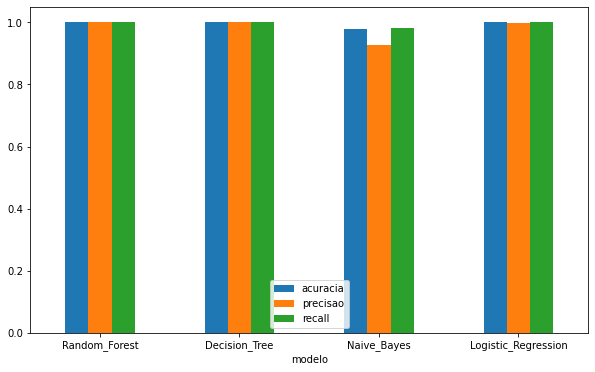

In [207]:
df_results.plot.bar(x="modelo", rot=0, figsize=(10,6))

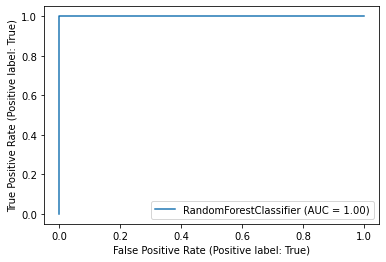

In [208]:
metrics.plot_roc_curve(trained_models[0][1], X_test, y_test) 

In [209]:

trained_models[3]

('Logistic_Regression',
 LogisticRegression(max_iter=1000, random_state=0),
 0.9995358282564549)

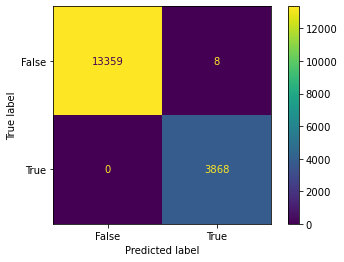

In [210]:
metrics.plot_confusion_matrix(trained_models[3][1], X_test, y_test) 
